# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [ ]:
!pip install prophet

Installing the yfinance package, which provides financial market data from Yahoo Finance

In [ ]:

!pip install yfinance --upgrade --no-cache-dir

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for S& P 500. Ticker symbol is ABR. (or any other on the list ex.  '^GSPC'. '^GSPC' is the S & P 500 Ticker Symbol)

To view
[Ticker Symbols list](https://stockanalysis.com/stocks/)

In [ ]:
# import libraries
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import matplotlib.pyplot as plt

import yfinance as yf

from datetime import timedelta



In [ ]:
# stock='^GSPC'

In [ ]:
stock='MPB'

In [ ]:
start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Most historic Stock Prices
df.head()

Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,MPB,MPB,MPB,MPB,MPB,MPB,MPB
Date,,,,,,,
1997-12-04 00:00:00+00:00,7.753699,0.0,7.784838,7.753699,7.784838,0.0,255
1997-12-05 00:00:00+00:00,7.971670,0.0,7.971670,7.847113,7.847113,0.0,1659
1997-12-08 00:00:00+00:00,8.033956,0.0,8.033956,8.033956,8.033956,0.0,255
1997-12-09 00:00:00+00:00,8.033956,0.0,8.033956,8.033956,8.033956,0.0,0
1997-12-10 00:00:00+00:00,7.971670,0.0,7.971670,7.971670,7.971670,0.0,511


In [ ]:
# Most recent stock prices
df.tail()


Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,MPB,MPB,MPB,MPB,MPB,MPB,MPB
Date,,,,,,,
2024-10-22 00:00:00+00:00,30.75,0.0,30.840000,30.510000,30.510000,0.0,20100
2024-10-23 00:00:00+00:00,31.00,0.0,31.059999,29.910000,30.520000,0.0,23300
2024-10-24 00:00:00+00:00,31.25,0.0,31.500000,30.740000,30.809999,0.0,24900
2024-10-25 00:00:00+00:00,31.09,0.0,31.490000,30.629999,31.490000,0.0,59800
2024-10-28 00:00:00+00:00,32.25,0.0,32.590000,31.600000,31.600000,0.0,43000


View Closing values only

In [ ]:
df = df.loc[:, ['Close']]

In [ ]:
# Most historic Stock closing Prices
df.head()

Price,Close
Ticker,MPB
Date,
1997-12-04 00:00:00+00:00,7.753699
1997-12-05 00:00:00+00:00,7.971670
1997-12-08 00:00:00+00:00,8.033956
1997-12-09 00:00:00+00:00,8.033956
1997-12-10 00:00:00+00:00,7.971670


In [ ]:
# Most recent stock closing prices
df.tail()


Price,Close
Ticker,MPB
Date,
2024-10-22 00:00:00+00:00,30.75
2024-10-23 00:00:00+00:00,31.00
2024-10-24 00:00:00+00:00,31.25
2024-10-25 00:00:00+00:00,31.09
2024-10-28 00:00:00+00:00,32.25


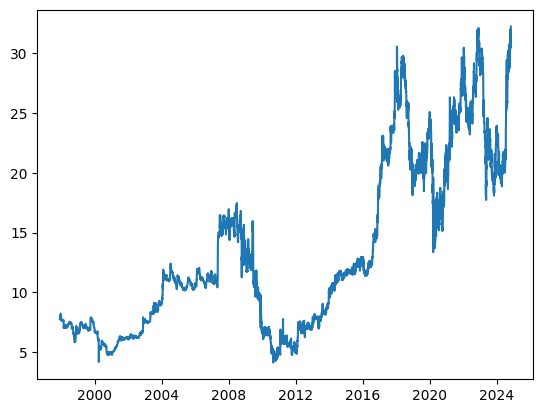

In [ ]:
plt.plot(df['Close'])

 In Facebook's Prophet forecasting library, the DataFrame you pass to the model must have two columns: "ds" and "y". The "ds" (datestamp) column should contain the dates, typically in 'YYYY-MM-DD' format for daily data or datetime format for sub-daily data. The "y" column must contain the numerical values we want to forecast or model.

So if you are working with a DataFrame that has a "Date" column and you want to use it with Prophet, you would need to rename it to "ds"

In [ ]:
df

Price,Close
Ticker,MPB
Date,
1997-12-04 00:00:00+00:00,7.753699
1997-12-05 00:00:00+00:00,7.971670
1997-12-08 00:00:00+00:00,8.033956
1997-12-09 00:00:00+00:00,8.033956
1997-12-10 00:00:00+00:00,7.971670
...,...
2024-10-22 00:00:00+00:00,30.750000
2024-10-23 00:00:00+00:00,31.000000


In [ ]:
print(df.columns)

# Flatten the MultiIndex and convert it into regular columns
df.columns = df.columns.get_level_values(0)  # Get only the first level of the MultiIndex

# Ensure that the date column is in the DataFrame (if it's in the index, move it to a column)
df['Date'] = df.index

# Rename the columns for Prophet: 'Date' to 'ds' and 'Close' (or whichever column you need) to 'y'
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

# Check the final structure of the DataFrame
print(df.head())

MultiIndex([('Close', 'MPB')],
           names=['Price', 'Ticker'])
Price                             y                        ds
Date                                                         
1997-12-04 00:00:00+00:00  7.753699 1997-12-04 00:00:00+00:00
1997-12-05 00:00:00+00:00  7.971670 1997-12-05 00:00:00+00:00
1997-12-08 00:00:00+00:00  8.033956 1997-12-08 00:00:00+00:00
1997-12-09 00:00:00+00:00  8.033956 1997-12-09 00:00:00+00:00
1997-12-10 00:00:00+00:00  7.971670 1997-12-10 00:00:00+00:00


In [ ]:
print(df.columns)

Index(['y', 'ds'], dtype='object', name='Price')


In [ ]:
df.head()

In [ ]:
df.tail()

Price,y,ds
Date,,
2024-10-22 00:00:00+00:00,30.75,2024-10-22 00:00:00+00:00
2024-10-23 00:00:00+00:00,31.00,2024-10-23 00:00:00+00:00
2024-10-24 00:00:00+00:00,31.25,2024-10-24 00:00:00+00:00
2024-10-25 00:00:00+00:00,31.09,2024-10-25 00:00:00+00:00
2024-10-28 00:00:00+00:00,32.25,2024-10-28 00:00:00+00:00


# Make Stock Predictions using Facebook's Prophet

In [ ]:
df['ds'] = df['ds'].dt.tz_localize(None)

In [ ]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxzx40kk3/vus5by3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxzx40kk3/5co9g06y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92706', 'data', 'file=/tmp/tmpxzx40kk3/vus5by3l.json', 'init=/tmp/tmpxzx40kk3/5co9g06y.json', 'output', 'file=/tmp/tmpxzx40kk3/prophet_modelr64tgso4/prophet_model-20241029225255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:52:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:52:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:

future = model.make_future_dataframe(periods=151)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6914,2025-03-24,25.799872,23.397911,28.295037
6915,2025-03-25,25.787763,23.174211,28.078789
6916,2025-03-26,25.753793,23.285659,28.197895
6917,2025-03-27,25.741029,23.214617,28.328165
6918,2025-03-28,25.758116,23.333781,28.273255


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small

In [ ]:
plot_components_plotly(model, forecast)

# Deploy on Gradio

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130

In [ ]:
import gradio as gr
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

def predict_stock(stock_ticker, start_date, end_date, periods):
    # Download stock data from Yahoo Finance
    df = yf.download(stock_ticker, start=start_date, end=end_date, auto_adjust=True, actions='inline', progress=False)

    # Print the column structure to inspect the MultiIndex
    print("Columns before renaming:")
    print(df.columns)

    # Flatten the MultiIndex and convert it into regular columns (if necessary)
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)  # Get only the first level of the MultiIndex

    # Ensure that the date column is in the DataFrame (if it's in the index, move it to a column)
    df['Date'] = df.index

    # Print the columns again to verify the structure after flattening
    print("Columns after flattening:")
    print(df.columns)

    # Rename the columns for Prophet: 'Date' to 'ds' and 'Close' to 'y'
    df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

    # Remove timezone information from 'ds' (if any)
    df['ds'] = df['ds'].dt.tz_localize(None)

    # Fit the Prophet model
    model = Prophet()
    model.fit(df)

    # Create a future dataframe for predictions
    future = model.make_future_dataframe(periods=int(periods))
    forecast = model.predict(future)

    # Generate the forecast plot
    fig = plot_plotly(model, forecast)
    return fig

# Gradio UI
with gr.Blocks() as demo:
    stock_ticker = gr.Textbox(label="Stock Ticker Symbol")
    start_date = gr.Textbox(label="Start Date (YYYY-MM-DD)", value=(datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d'))
    end_date = gr.Textbox(label="End Date (YYYY-MM-DD)", value=datetime.now().strftime('%Y-%m-%d'))
    periods = gr.Number(label="Number of Days to Predict", value=30)

    outputs = gr.Plot()

    submit_button = gr.Button("Predict")
    submit_button.click(predict_stock, inputs=[stock_ticker, start_date, end_date, periods], outputs=outputs)

# Launch the Gradio interface
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://daf9714588575c88e5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Deploy on Huggingface Spaces - Public Deployment

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)

In [117]:
!gradio deploy


Traceback (most recent call last):
  File "/usr/local/bin/gradio", line 5, in <module>
    from gradio.cli import cli
  File "/usr/local/lib/python3.10/dist-packages/gradio/__init__.py", line 3, in <module>
    import gradio._simple_templates
  File "/usr/local/lib/python3.10/dist-packages/gradio/_simple_templates/__init__.py", line 1, in <module>
    from .simpledropdown import SimpleDropdown
  File "/usr/local/lib/python3.10/dist-packages/gradio/_simple_templates/simpledropdown.py", line 7, in <module>
    from gradio.components.base import Component, FormComponent
  File "/usr/local/lib/python3.10/dist-packages/gradio/components/__init__.py", line 1, in <module>
    from gradio.components.annotated_image import AnnotatedImage
  File "/usr/local/lib/python3.10/dist-packages/gradio/components/annotated_image.py", line 8, in <module>
    import gradio_client.utils as client_utils
  File "/usr/local/lib/python3.10/dist-packages/gradio_client/__init__.py", line 1, in <module>
    from gr

#Interview Readiness Questions
1. Choose a new Ticker Symbol.  What is your ticker symbol?

Answer: MPB - Mid Penn Bancorp, Inc.
2. What were the future price predictions

Answer: 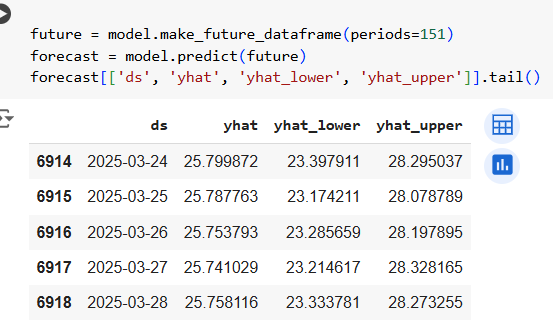
3. What were the initial price predictions

Answer: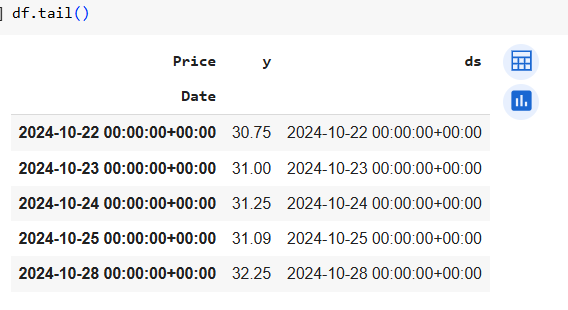

# References
[HuggingFace](www.huggingface.co)

[Gradio](https://www.gradio.app/guides/quickstart)


1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV
